## Softmax regression in sklearn

In [56]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [ ]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml1920/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [86]:
# legge i dati in dataframe pandas
data = pd.read_csv(get_file("iris.csv", False), delimiter=';')

# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['sepal_length','sepal_width']])
t = np.array(data['class']).reshape(-1,1)

In [87]:
encoder = LabelEncoder()
t = encoder.fit_transform(t)

# split dataset in train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

In [88]:
X_train.shape

(105, 2)

In [89]:
scaler = StandardScaler()
logreg = LogisticRegression()

model = Pipeline([('scale', scaler), ('clf', logreg)])

model.set_params(clf__C=1e5)
model = model.fit(X_train, t_train)

In [90]:
delta1=max(X[:,0])-min(X[:,0])
delta2=max(X[:,1])-min(X[:,1])
min1=min(X[:,0])-delta1/10
max1=max(X[:,0])+delta1/10
min2=min(X[:,1])-delta2/10
max2=max(X[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)
p2 = p[:,2].reshape(u.shape)

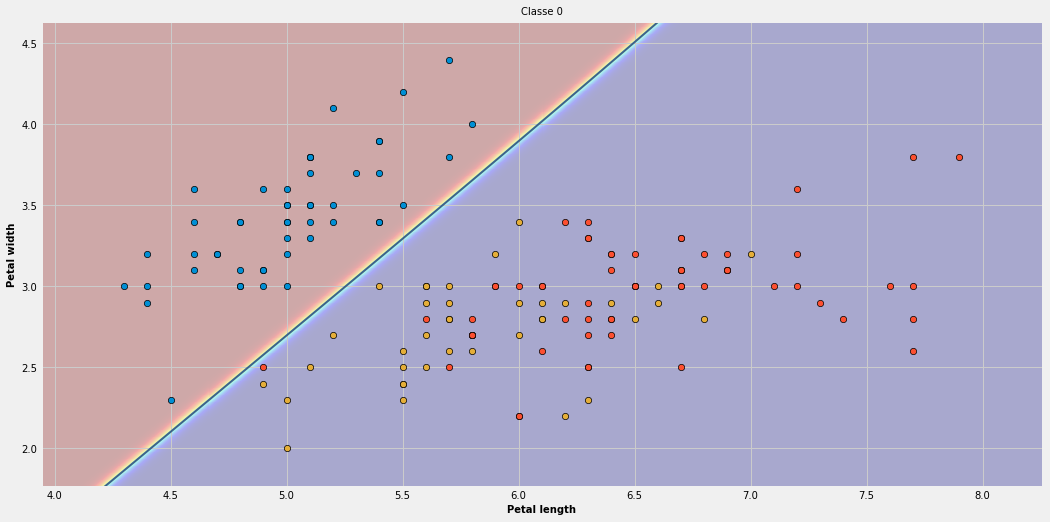

In [91]:
X_s, t_s=X, t
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p0, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p0, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Petal length', fontsize=10)
plt.ylabel('Petal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 0')
plt.show()

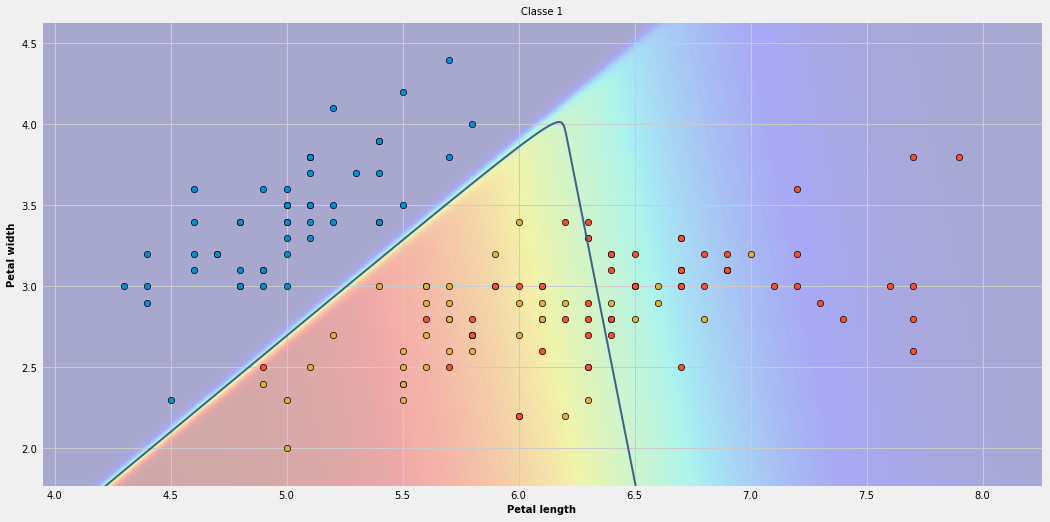

In [92]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p1, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Petal length', fontsize=10)
plt.ylabel('Petal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 1')
plt.show()

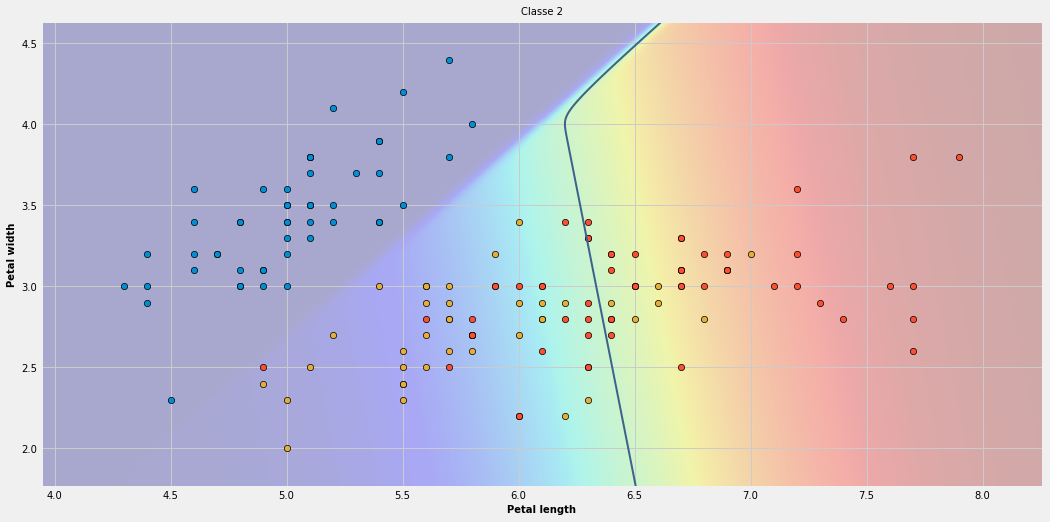

In [93]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p2, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p2, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Petal length', fontsize=10)
plt.ylabel('Petal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 2')
plt.show()

In [94]:
y = model.predict(X_train)
y_t = model.predict(X_test)

In [95]:
print(confusion_matrix(y,t_train))

[[37  0  0]
 [ 0 25 10]
 [ 0 10 23]]


In [96]:
print(confusion_matrix(y_t,t_test))

[[13  0  0]
 [ 0 13  7]
 [ 0  2 10]]


In [97]:
print(classification_report(y,t_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.71      0.71      0.71        35
           2       0.70      0.70      0.70        33

    accuracy                           0.81       105
   macro avg       0.80      0.80      0.80       105
weighted avg       0.81      0.81      0.81       105



In [98]:
print(classification_report(y_t,t_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      0.65      0.74        20
           2       0.59      0.83      0.69        12

    accuracy                           0.80        45
   macro avg       0.82      0.83      0.81        45
weighted avg       0.83      0.80      0.80        45



In [99]:
print(accuracy_score(y,t_train))

0.8095238095238095


In [100]:
print(accuracy_score(y_t,t_test))

0.8


In [101]:
X = np.array(data[data.columns[:-1]])

In [102]:
X.shape

(150, 4)

In [103]:
t = encoder.fit_transform(t)

In [105]:
model.set_params(clf__C=1e5)
model = model.fit(X, t)

In [106]:
y = model.predict(X)

In [107]:
print(confusion_matrix(y,t))

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


In [108]:
print(classification_report(y,t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [111]:
print(accuracy_score(y,t))

0.9866666666666667


In [112]:
fs = SelectKBest(mutual_info_classif, k=1).fit(X, y)

In [113]:
fs.get_support()

array([ True, False, False, False])

In [114]:
X_new = fs.transform(X)

In [115]:
X_new.shape

(150, 1)

In [116]:
model.set_params(clf__C=1e5)
y = model.fit(X_new, t).predict(X_new)

In [117]:
print(accuracy_score(y,t))

0.9533333333333334


In [118]:
accs = []
for k in range(1,5):
    X_new = SelectKBest(mutual_info_classif, k=k).fit_transform(X, y)
    y = model.fit(X_new, t).predict(X_new)
    accs.append(accuracy_score(y,t))

In [119]:
accs

[0.9533333333333334, 0.96, 0.98, 0.9866666666666667]

In [121]:
domain = np.linspace(5.9,6,100)
param_grid = [{'C': domain, 'penalty': ['l1','l2']}]
r = LogisticRegression()
clf = GridSearchCV(r, param_grid, cv=10, scoring='accuracy')

In [122]:
clf = clf.fit(X,t)
scores = clf.cv_results_['mean_test_score']

In [124]:
clf.best_params_['C']

5.9

In [125]:
clf.best_params_['penalty']

'l2'

In [126]:
y = clf.predict(X)

In [127]:
print(confusion_matrix(y,t))

[[50  0  0]
 [ 0 48  0]
 [ 0  2 50]]


In [128]:
print(classification_report(y,t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      1.00      0.98        48
           2       1.00      0.96      0.98        52

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [38]:
print('{0:3.5f}'.format(accuracy_score(y,t)))

0.98667
